<a href="https://colab.research.google.com/github/aut22lee008/Sabari-nivas/blob/main/sabarinivas_(aut22lee008).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


Epoch 1/20
40/40 [==============================] - 28s 128ms/step - loss: 0.0304
Epoch 2/20
40/40 [==============================] - 5s 133ms/step - loss: 0.0063
Epoch 3/20
40/40 [==============================] - 4s 104ms/step - loss: 0.0055
Epoch 4/20
40/40 [==============================] - 4s 103ms/step - loss: 0.0054
Epoch 5/20
40/40 [==============================] - 5s 132ms/step - loss: 0.0060
Epoch 6/20
40/40 [==============================] - 4s 104ms/step - loss: 0.0062
Epoch 7/20
40/40 [==============================] - 4s 104ms/step - loss: 0.0054
Epoch 8/20
40/40 [==============================] - 5s 133ms/step - loss: 0.0052
Epoch 9/20
40/40 [==============================] - 4s 105ms/step - loss: 0.0043
Epoch 10/20
40/40 [==============================] - 4s 110ms/step - loss: 0.0040
Epoch 11/20
40/40 [==============================] - 5s 124ms/step - loss: 0.0044
Epoch 12/20
40/40 [==============================] - 4s 103ms/step - loss: 0.0042
Epoch 13/20
40/40 [=====

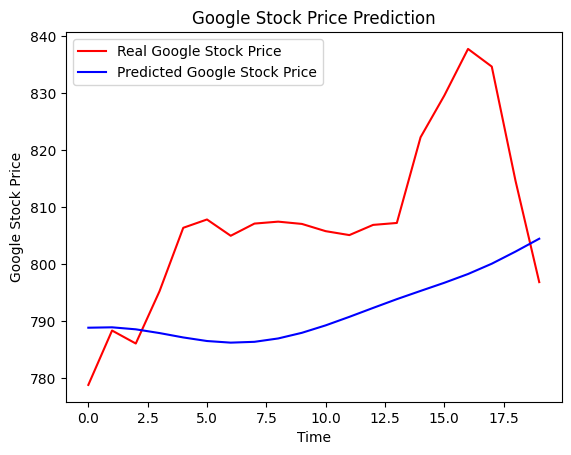

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset_train = pd.read_csv('https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Data/Google_Stock_Price_Train.csv')

training_set = dataset_train.iloc[:, 1:2].values


from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []

y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


display(dataset_train)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 20, batch_size = 30)


dataset_test = pd.read_csv('https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()